# Glass Identification:-

Problem Statement:
    
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!



The chemical compositions are measured as the weight percent in corresponding oxide.

In [5]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [6]:
df=pd.read_csv("glass.csv")
df

,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.00.1,1.1
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


Our target column is 1.1 which is nothing but the type of glass.we need to predict the type of glass

Replacing the columns name with categorical name which is given in the Problem Statement.

In [7]:
df.set_axis(['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type of glass'],axis='columns',inplace=True)

In [8]:
df

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.00,0.26,1
...,...,...,...,...,...,...,...,...,...,...,...
208,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.00,7
209,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.00,7
210,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.00,7
211,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.00,7


In [9]:
df.shape

(213, 11)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             213 non-null    int64  
 1   RI             213 non-null    float64
 2   Na             213 non-null    float64
 3   Mg             213 non-null    float64
 4   Al             213 non-null    float64
 5   Si             213 non-null    float64
 6   K              213 non-null    float64
 7   Ca             213 non-null    float64
 8   Ba             213 non-null    float64
 9   Fe             213 non-null    float64
 10  Type of glass  213 non-null    int64  
dtypes: float64(9), int64(2)
memory usage: 18.4 KB


In [11]:
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.00,1
1,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.00,1
2,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.00,1
3,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.00,1
4,6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0.0,0.26,1


In [12]:
df.tail()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
208,210,1.51623,14.14,0.0,2.88,72.61,0.08,9.18,1.06,0.0,7
209,211,1.51685,14.92,0.0,1.99,73.06,0.00,8.40,1.59,0.0,7
210,212,1.52065,14.36,0.0,2.02,73.42,0.00,8.44,1.64,0.0,7
211,213,1.51651,14.38,0.0,1.94,73.61,0.00,8.48,1.57,0.0,7
212,214,1.51711,14.23,0.0,2.08,73.36,0.00,8.62,1.67,0.0,7


In [13]:
df.columns

Index(['Id', 'RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe',
       'Type of glass'],
      dtype='object')

In [14]:
#finding the missing values if any?
df.isnull().sum()

Id               0
RI               0
Na               0
Mg               0
Al               0
Si               0
K                0
Ca               0
Ba               0
Fe               0
Type of glass    0
dtype: int64

In [15]:
df.skew()

Id               0.000000
RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.406749
Fe               1.747173
Type of glass    1.108861
dtype: float64

In [16]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.175869,0.057277,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.498245,0.097589,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.000000,0.000000,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.000000,0.000000,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.000000,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [17]:
#Dealing with the Zero values

In [18]:
df["Ba"]=df['Ba'].replace(0,df['Ba'].mean())
df['Fe']=df['Fe'].replace(0,df['Fe'].mean())

In [19]:
df.describe()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
count,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000,213.000000
mean,108.000000,1.518353,13.406761,2.676056,1.446526,72.655023,0.499108,8.957934,0.320361,0.095731,2.788732
std,61.631972,0.003039,0.818371,1.440453,0.499882,0.774052,0.653035,1.426435,0.449154,0.076323,2.105130
min,2.000000,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.060000,0.010000,1.000000
25%,55.000000,1.516520,12.900000,2.090000,1.190000,72.280000,0.130000,8.240000,0.175869,0.057277,1.000000
50%,108.000000,1.517680,13.300000,3.480000,1.360000,72.790000,0.560000,8.600000,0.175869,0.057277,2.000000
75%,161.000000,1.519150,13.830000,3.600000,1.630000,73.090000,0.610000,9.180000,0.175869,0.100000,3.000000
max,214.000000,1.533930,17.380000,3.980000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


now we have treated the zero values

In [20]:
df.skew()

Id               0.000000
RI               1.639658
Na               0.457318
Mg              -1.154323
Al               0.900017
Si              -0.744546
K                6.549276
Ca               2.040591
Ba               3.692318
Fe               2.284710
Type of glass    1.108861
dtype: float64

The above data is showing that having huge skewness so need to treat it.

In [21]:
df['RI'].skew()

1.6396577432918238

In [22]:
df_log=np.log(df['RI'])
df_log.skew

<bound method NDFrame._add_numeric_operations.<locals>.skew of 0      0.417137
1      0.416194
2      0.417170
3      0.417012
4      0.416049
         ...   
208    0.416227
209    0.416636
210    0.419138
211    0.416412
212    0.416807
Name: RI, Length: 213, dtype: float64>

In [23]:
from sklearn.preprocessing import PowerTransformer
import seaborn as sns

In [24]:
features=['Ba','Fe','Ca','K','Si','Al','Mg','RI']
scaler=PowerTransformer(method='yeo-johnson')
df[features]=scaler.fit_transform(df[features].values)

In [25]:
df.skew()

Id               0.000000
RI               0.000000
Na               0.457318
Mg              -0.911150
Al               0.000874
Si               0.133867
K               -0.075233
Ca              -0.207808
Ba               1.074926
Fe               0.611737
Type of glass    1.108861
dtype: float64

We are observing that there is still some skewness presents inside the dataset

# Bivariate Analysis

Id                  AxesSubplot(0.125,0.536818;0.0945122x0.343182)
RI               AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Na               AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Mg               AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Al               AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Si               AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
K                AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Ca                     AxesSubplot(0.125,0.125;0.0945122x0.343182)
Ba                  AxesSubplot(0.238415,0.125;0.0945122x0.343182)
Fe                  AxesSubplot(0.351829,0.125;0.0945122x0.343182)
Type of glass       AxesSubplot(0.465244,0.125;0.0945122x0.343182)
dtype: object

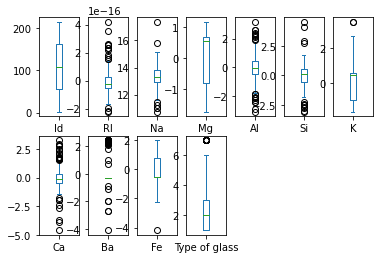

In [26]:
df.plot(kind='box',subplots=True,layout=(2,7))

# Univariate Analysis

<AxesSubplot:xlabel='Type of glass', ylabel='Fe'>

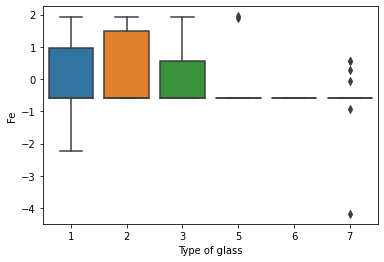

In [28]:
sns.boxplot('Type of glass', 'Fe', data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Na'>

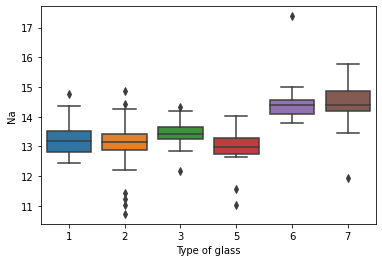

In [29]:
sns.boxplot('Type of glass','Na',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='K'>

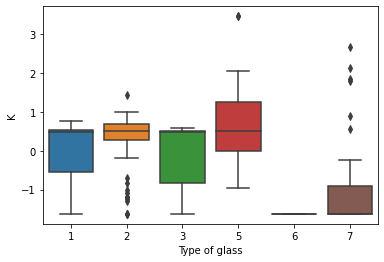

In [30]:
sns.boxplot("Type of glass",'K',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Al'>

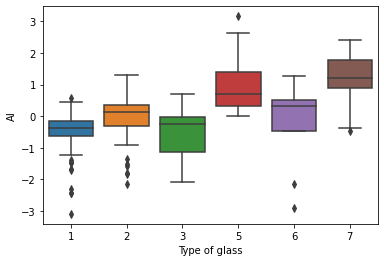

In [31]:
sns.boxplot('Type of glass','Al',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Si'>

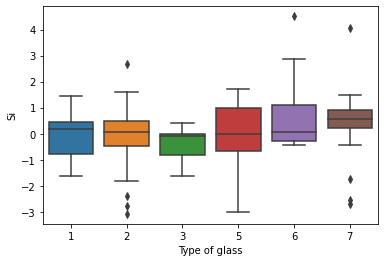

In [32]:
sns.boxplot("Type of glass",'Si',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='Ba'>

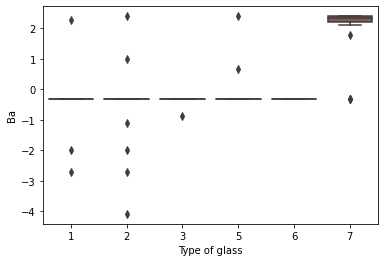

In [33]:
sns.boxplot("Type of glass",'Ba',data=df)

<AxesSubplot:xlabel='Type of glass', ylabel='RI'>

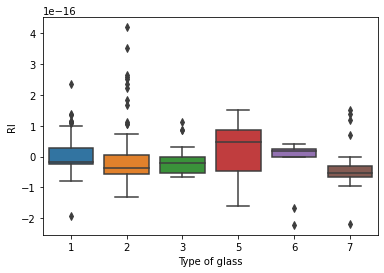

In [34]:
sns.boxplot('Type of glass','RI',data=df)

From the above graphs we can observe that there is too much outliers present in the data so need to treat it.

We are going to use the Ztransform method for treatment of Outliers.

In [35]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
print(z)

           Id        RI        Na        Mg        Al        Si         K  \
0    1.723938  0.229755  0.591880  0.681474  0.081445  0.038252  0.268575   
1    1.707675  0.704878  0.150946  0.620552  0.286720  0.394607  0.011888   
2    1.691411  0.229755  0.240996  0.793249  0.232162  0.121300  0.496129   
3    1.675147  0.308942  0.167507  0.706078  0.342629  0.521438  0.447821   
4    1.658884  0.784065  0.755419  0.693759  0.442150  0.366668  0.656025   
..        ...       ...       ...       ...       ...       ...       ...   
208  1.658884  0.704878  0.898085  1.738836  2.415518  0.121300  1.195502   
209  1.675147  0.506910  1.853443  1.738836  1.104938  0.493096  1.627123   
210  1.691411  0.799680  1.167545  1.738836  1.155073  1.017262  1.627123   
211  1.707675  0.586097  1.192041  1.738836  1.020265  1.306184  1.627123   
212  1.723938  0.427723  1.008318  1.738836  1.253886  0.927811  1.627123   

           Ca        Ba        Fe  Type of glass  
0    0.882521  0.302429 

In [36]:
threshold = 3
print(np.where(z > 3))

(array([ 20, 105, 105, 105, 106, 106, 111, 141, 162, 162, 162, 170, 171,
       183, 183, 184, 185, 195, 200], dtype=int64), array([4, 1, 2, 5, 1, 7, 1, 8, 4, 5, 7, 6, 6, 2, 5, 7, 7, 9, 5],
      dtype=int64))


In [37]:
 df=df[(z < 3).all(axis=1)]

In [38]:
df.shape

(200, 11)

In [39]:
df.target = df['Type of glass'] 

In [40]:
#correlation between the features
df.corr()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type of glass
Id,1.000000,-0.001431,0.429969,-0.661175,0.466983,0.081442,-0.430165,0.192956,0.531934,-0.102493,0.874911
RI,-0.001431,1.000000,-0.048097,-0.100126,-0.500922,-0.578837,-0.274352,0.747896,-0.154078,0.031994,-0.082418
Na,0.429969,-0.048097,1.000000,-0.350086,0.233736,-0.246560,-0.591828,-0.128515,0.562545,-0.187521,0.556693
Mg,-0.661175,-0.100126,-0.350086,1.000000,-0.511848,-0.303648,0.509483,-0.462515,-0.608362,0.135523,-0.788266
Al,0.466983,-0.500922,0.233736,-0.511848,1.000000,0.281607,0.012847,-0.265606,0.544738,-0.097739,0.593891
Si,0.081442,-0.578837,-0.246560,-0.303648,0.281607,1.000000,0.008776,-0.211816,0.169900,-0.059170,0.196724
K,-0.430165,-0.274352,-0.591828,0.509483,0.012847,0.008776,1.000000,-0.411770,-0.502850,0.168252,-0.532035
Ca,0.192956,0.747896,-0.128515,-0.462515,-0.265606,-0.211816,-0.411770,1.000000,-0.075305,0.024865,0.137826
Ba,0.531934,-0.154078,0.562545,-0.608362,0.544738,0.169900,-0.502850,-0.075305,1.000000,-0.202544,0.707155
Fe,-0.102493,0.031994,-0.187521,0.135523,-0.097739,-0.059170,0.168252,0.024865,-0.202544,1.000000,-0.208856


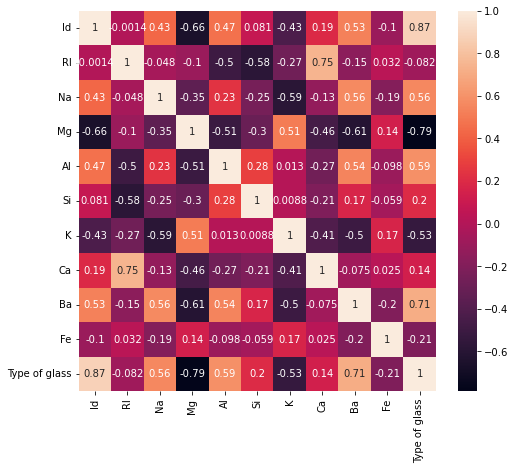

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_hmap=df.corr()
plt.figure(figsize=(8,7))
sns.heatmap(corr_hmap,annot=True)
plt.show()

'Mg'column highly negative correlated so can drop the Mg column

In [43]:
df.drop(columns=['Mg'],axis=1,inplace=True)

In [44]:
df

,Id,RI,Na,Al,Si,K,Ca,Ba,Fe,Type of glass
0,2,-2.081668e-17,13.89,-0.081445,0.038252,0.268575,-0.882521,-0.302429,-0.570628,1
1,3,-6.245005e-17,13.53,0.286720,0.394607,0.011888,-0.936107,-0.302429,-0.570628,1
2,4,-2.081668e-17,13.21,-0.232162,-0.121300,0.496129,-0.487918,-0.302429,-0.570628,1
3,5,-2.775558e-17,13.27,-0.342629,0.521438,0.447821,-0.634960,-0.302429,-0.570628,1
4,6,-6.938894e-17,12.79,0.442150,0.366668,0.656025,-0.634960,-0.302429,1.869530,1
...,...,...,...,...,...,...,...,...,...,...
208,210,-6.245005e-17,14.14,2.415518,-0.121300,-1.195502,0.333739,2.373630,-0.570628,7
209,211,-4.510281e-17,14.92,1.104938,0.493096,-1.627123,-0.318743,2.393978,-0.570628,7
210,212,6.938894e-17,14.36,1.155073,1.017262,-1.627123,-0.282179,2.394491,-0.570628,7
211,213,-5.204170e-17,14.38,1.020265,1.306184,-1.627123,-0.245979,2.393745,-0.570628,7


array([[<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>],
       [<AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>,
        <AxesSubplot:ylabel='Frequency'>]], dtype=object)

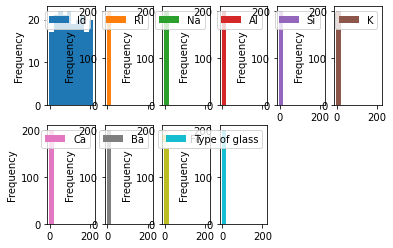

In [45]:
df.plot(kind='hist',subplots=True,layout=(2,6))

In [46]:
#splitting the datasets
x=df.iloc[:,0:-1]
y=df.iloc[:,-1]

In [47]:
x.shape

(200, 9)

In [48]:
y.shape

(200,)

In [49]:
x.head()

,Id,RI,Na,Al,Si,K,Ca,Ba,Fe
0,2,-2.081668e-17,13.89,-0.081445,0.038252,0.268575,-0.882521,-0.302429,-0.570628
1,3,-6.245005e-17,13.53,0.286720,0.394607,0.011888,-0.936107,-0.302429,-0.570628
2,4,-2.081668e-17,13.21,-0.232162,-0.121300,0.496129,-0.487918,-0.302429,-0.570628
3,5,-2.775558e-17,13.27,-0.342629,0.521438,0.447821,-0.634960,-0.302429,-0.570628
4,6,-6.938894e-17,12.79,0.442150,0.366668,0.656025,-0.634960,-0.302429,1.869530


In [50]:
y.head

<bound method NDFrame.head of 0      1
1      1
2      1
3      1
4      1
      ..
208    7
209    7
210    7
211    7
212    7
Name: Type of glass, Length: 200, dtype: int64>

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score
from time import time

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=43)

In [53]:
scaler = StandardScaler()
df_x = scaler.fit_transform(x)
df_x

array([[-1.68720239, -0.26912287,  0.64993206, ..., -1.17777314,
        -0.29958085, -0.61753886],
       [-1.67085749, -0.8322396 ,  0.16696056, ..., -1.24560183,
        -0.29958085, -0.61753886],
       [-1.65451259, -0.26912287, -0.26234743, ..., -0.67829598,
        -0.29958085, -0.61753886],
       ...,
       [ 1.74522679,  0.95096338,  1.28047818, ..., -0.41787662,
         2.64986761, -0.61753886],
       [ 1.76157169, -0.69146042,  1.30730993, ..., -0.37205472,
         2.64905108, -0.61753886],
       [ 1.77791659, -0.50375484,  1.10607181, ..., -0.21520658,
         2.65015935, -0.61753886]])

Number of components explained 99% variance :  8


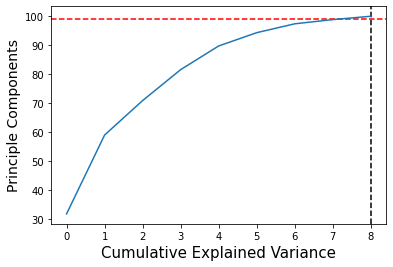

In [54]:
from sklearn.decomposition import PCA
from sklearn.metrics import explained_variance_score

test_pca = PCA()
test_pca.fit(df_x)

var_cumu = np.cumsum(test_pca.explained_variance_ratio_)*100

k = np.argmax(var_cumu>99)

print("Number of components explained 99% variance : ",k)

plt.xlabel("Cumulative Explained Variance", fontsize=15)
plt.ylabel("Principle Components",fontsize=14)
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=99, color="r", linestyle="--")
plt.plot(var_cumu)
plt.show()

out of 10 columns only 7 columns are giving 99% varriance so lets use PCA technique

In [55]:
# PCA Scaling for model building

pca = PCA(n_components=7)
xx = pca.fit_transform(df_x)
xx

array([[-0.48476251, -1.0095593 , -1.55111579, ..., -0.51614906,
        -0.58308807, -0.41635243],
       [-0.23817198, -1.60377732, -1.02078689, ..., -0.6275586 ,
        -0.63003621, -0.69755323],
       [-1.08023053, -0.90996771, -0.99726248, ..., -0.09854461,
        -0.74155852, -0.22370767],
       ...,
       [ 3.90891956,  0.90166975,  0.66749349, ..., -0.26473534,
        -0.68296344,  0.94889732],
       [ 4.23427392, -0.08188531,  0.78249335, ..., -0.77763618,
        -0.26374903,  0.62225444],
       [ 4.14540965,  0.17003457,  0.73592652, ..., -0.35156988,
        -0.44402511,  0.49642369]])

In [61]:
# Let's find best score with best state

def beststate(mod):
    max_score = 0
    max_state = 0
    start = time()
    for i in range(50,100):
        x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=i)
        mod.fit(x_train, y_train)
        y_pre = mod.predict(x_test)
        score = r2_score(y_test, y_pre)
        if score > max_score:
            max_score = score
            max_state = i
    print("Best Random State      : ",max_state)
    print("Best R2_Score          : ",max_score)
    print("Cross Validation Score : ",-cross_val_score(mod, xx, y, cv=5, scoring="r2").mean())
    
    end = time()
    print("\nTime taken by model for prediction {:.4f} seconds".format(end-start))

In [62]:
# Decision Tree Regressor

from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()
beststate(DTR)

Best Random State      :  78
Best R2_Score          :  0.9113475177304965
Cross Validation Score :  8.99659860794663

Time taken by model for prediction 0.1580 seconds


In [63]:
# K-Neighbors Regressor

from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()
beststate(KNR)

Best Random State      :  89
Best R2_Score          :  0.9634823529411765
Cross Validation Score :  5.776478238781192

Time taken by model for prediction 0.1949 seconds


In [64]:
# Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

RFR = RandomForestRegressor()
beststate(RFR)

Best Random State      :  89
Best R2_Score          :  0.9718367058823529
Cross Validation Score :  8.305667788896658

Time taken by model for prediction 9.5377 seconds


In [65]:
# Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()
beststate(GBR)

Best Random State      :  89
Best R2_Score          :  0.9715458678247383
Cross Validation Score :  8.334891928406917

Time taken by model for prediction 3.3457 seconds


In [87]:
# Support Vector Machine

from sklearn.svm import SVR

Svr = SVR()
beststate(Svr)

Best Random State      :  89
Best R2_Score          :  0.975962306523729
Cross Validation Score :  6.052050433413034

Time taken by model for prediction 0.2515 seconds


Support Vector Machine Regressor is giving the best value.For more accuracy we can go for the HyperParameter Tunning with SVR

# Final Model (Support Vector Machine Regressor)

In [92]:
# Hyper Parameter Tuning with SVR

x_train, x_test, y_train, y_test = train_test_split(xx, y, test_size=0.25, random_state=74)


In [93]:
from sklearn.model_selection import GridSearchCV

In [102]:
param_grid = {'C': [1.0], 
              'gamma': ['scale'],
              'kernel': ['rbf'],
              'degree':[3],
             'coef0':[0.0],
             'tol':[1e-3],
             'C':[1.0],
             'epsilon':[0.1],
             'shrinking':['True'],
             'cache_size':[200],
             'verbose':['False'],
             'max_iter':[-1]} 
  
grid = GridSearchCV(SVR, param_grid)

In [103]:
grid_search.fit(x_train, y_train)

ValueError: Invalid parameter learning_rate for estimator SVR(). Check the list of available parameters with `estimator.get_params().keys()`.